In [14]:
import numpy as np
import pandas as pd
import os
from scipy import stats
np.random.seed(42)
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
HOUSING_DATA = r"C:\Users\hcars\ML\housing.csv"
attrib = ["CRIM", "ZN","INDUS", "CHAS", "NOX", "RM",
                                             "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
def load_data(housing_path = HOUSING_DATA):
    return pd.read_csv(housing_path, delim_whitespace = True, names = attrib);
housing = load_data()
housing = housing.drop("B", axis = 1)
z = np.abs(stats.zscore(housing))
housing = housing[(z < 3).all(axis = 1)]
housing.head()
#housing.hist(bins=75, figsize=(20,15))

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,5.33,36.2


In [15]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 436 entries, 0 to 505
Data columns (total 13 columns):
CRIM       436 non-null float64
ZN         436 non-null float64
INDUS      436 non-null float64
CHAS       436 non-null int64
NOX        436 non-null float64
RM         436 non-null float64
AGE        436 non-null float64
DIS        436 non-null float64
RAD        436 non-null int64
TAX        436 non-null float64
PTRATIO    436 non-null float64
LSTAT      436 non-null float64
MEDV       436 non-null float64
dtypes: float64(11), int64(2)
memory usage: 47.7 KB


In [16]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,436.000000,436.000000,436.000000,436.0,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000
mean,2.815847,9.139908,11.157982,0.0,0.553146,6.269780,68.394495,3.770176,9.378440,406.314220,18.552982,12.702156,21.855734
std,5.134336,19.306599,6.806160,0.0,0.111841,0.602312,27.837216,1.953176,8.618419,167.271065,2.119687,6.689702,8.221438
min,0.006320,0.000000,0.460000,0.0,0.385000,4.368000,2.900000,1.169100,1.000000,188.000000,12.600000,1.730000,5.600000
25%,0.082973,0.000000,5.190000,0.0,0.453000,5.890500,45.550000,2.130850,4.000000,281.000000,17.400000,7.390000,16.775000
50%,0.243125,0.000000,9.125000,0.0,0.538000,6.201500,76.500000,3.239250,5.000000,330.000000,19.100000,11.645000,20.800000
75%,2.983900,0.000000,18.100000,0.0,0.624000,6.563500,94.025000,5.214600,24.000000,666.000000,20.200000,16.945000,24.600000
max,28.655800,80.000000,27.740000,0.0,0.871000,8.337000,100.000000,9.222900,24.000000,711.000000,21.200000,34.020000,50.000000


In [17]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(housing, test_size = .2, random_state = 42)
test.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
465,3.16360,0.0,18.10,0,0.655,5.759,48.2,3.0665,24,666.0,20.2,14.13,19.9
81,0.04462,25.0,4.86,0,0.426,6.619,70.4,5.4007,4,281.0,19.0,7.22,23.9
320,0.16760,0.0,7.38,0,0.493,6.426,52.3,4.5404,5,287.0,19.6,7.20,23.8
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280.0,17.0,5.99,24.5
386,24.39380,0.0,18.10,0,0.700,4.652,100.0,1.4672,24,666.0,20.2,28.28,10.5


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024F30238668>,
      dtype=object)

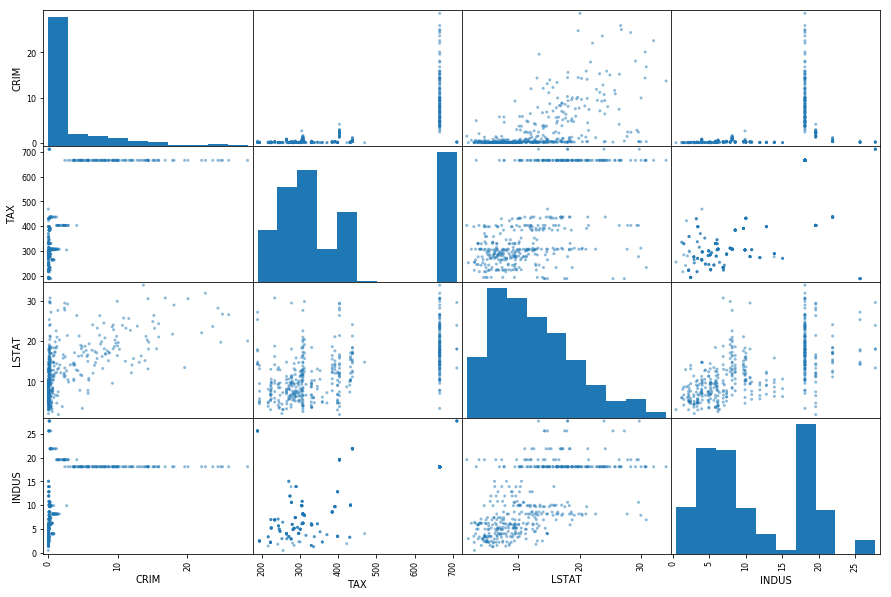

In [18]:
visual = train.copy()
from pandas.plotting import scatter_matrix
scatter_matrix(housing[["CRIM","TAX","LSTAT", "INDUS"]], figsize=(15, 10))

In [19]:
corr = housing.corr()
corr["TAX"].sort_values(ascending= False)

TAX        1.000000
RAD        0.905071
CRIM       0.751569
INDUS      0.717119
NOX        0.667432
LSTAT      0.567295
AGE        0.492691
PTRATIO    0.432431
RM        -0.245837
ZN        -0.294879
MEDV      -0.501375
DIS       -0.537870
CHAS            NaN
Name: TAX, dtype: float64